In [1]:
from dataclasses import dataclass
from typing import List, Optional
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import chain

import seaborn as sns

sns.set_theme()
plt.rcParams['figure.figsize'] = (16,9)

@dataclass
class PAFRecord:
    query_name: str
    query_length: int
    query_start: int
    query_end: int
    strand: str
    target_name: str
    target_length: int
    target_start: int
    target_end: int
    matching_bases: int
    bases_including_gaps: int
    mapping_quality: int
    optional_fields: Optional[List[str]] = None


In [2]:
def parse_paf_line(line: str) -> PAFRecord:
    fields = line.strip().split('\t')
    
    if len(fields) < 12:
        raise ValueError(f"Line has fewer than 12 fields: {line}")
    
    # Parse mandatory fields
    record = PAFRecord(
        query_name=fields[0],
        query_length=int(fields[1]),
        query_start=int(fields[2]),
        query_end=int(fields[3]),
        strand=fields[4],
        target_name=fields[5],
        target_length=int(fields[6]),
        target_start=int(fields[7]),
        target_end=int(fields[8]),
        matching_bases=int(fields[9]),
        bases_including_gaps=int(fields[10]),
        mapping_quality=int(fields[11]),
        optional_fields=fields[12:] if len(fields) > 12 else None
    )
    
    return record


In [3]:
def parse_paf_file(file_path: str) -> List[PAFRecord]:
    records = []
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#') or not line.strip():
                continue  # Skip comments and empty lines
            try:
                record = parse_paf_line(line)
                records.append(record)
            except ValueError as e:
                print(f"Skipping line due to error: {e}")
    return records

In [4]:
def parse_paf_file_optimized(file_path: str) -> List[PAFRecord]:
    records = []
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#') or not line.strip():
                continue  # Skip comments and empty lines
            try:
                record = parse_paf_line(line)
                records.append(record)
            except ValueError as e:
                print(f"Skipping line due to error: {e}")
    return records

In [5]:
file_path = r'/Users/disha/Desktop/Undergrad project/output_paf_files/'

In [6]:
file_paths = [os.path.join(file_path,file_name) for file_name in os.listdir(file_path) if ".paf" in  file_name]

In [7]:
a = parse_paf_file(file_paths[0])

In [8]:
a[0].optional_fields[8]

'de:f:0.0784'

In [9]:
record_dictionary = {file_path.split("/")[-1].split(".paf")[0]: [x.optional_fields[8].split(":")[-1] for x in parse_paf_file(file_path)] for file_path in file_paths}

In [46]:
# div_dictionary = {} # list of def values

# for key, value in record_dictionary.items():
#     div_lists = []
#     for seq in value: 
#         div = seq.optional_fields[8].split(":")[-1]
#         div_lists.append(float(div))
#     div_dictionary[key] = div_lists

In [27]:
stat_dictionary = []

for key,value in record_dictionary.items():
    stats = pd.Series(value).astype(float).describe()
    stat_dictionary.append(stats)
    
df_stats = pd.concat(stat_dictionary, axis = 1)
df_stats.columns = list(record_dictionary.keys())
df_stats.transpose().to_clipboard()

In [22]:
_df_stats = df_stats.transpose().reset_index()

In [10]:
df_excel = pd.read_clipboard()
df_excel = df_excel.dropna()

In [12]:
def generate_bfly_name(row: pd.Series) -> str:
    genus = row['Species 1 '].split(' ')[0].lower()
    first_name = row['Species 1 '].split(' ')[1]
    second_name = row['Species 2 '].split(' ')[1]
    return f'{genus}_{first_name}_{second_name}'.replace(' ', '')

df_excel['key'] = df_excel.apply(generate_bfly_name, axis=1)

In [28]:
mapping = pd.read_clipboard()

In [38]:
_mapping = mapping[['index', 'Answer ']]

In [30]:
def create_histogram_plot(div_values, butterfly_name):

    plot = plt.figure()
    plt.hist(div_values, color = "pink")
    plt.ylabel("Frequency")
    plt.axvline(0.083316, linestyle="dashed", alpha=0.6, label = "$\mu$")
    plt.legend()
    plt.title(f"{butterfly_name}")
    plt.close()
    return plot

In [39]:
_mapping.columns = ['bfly', 'answer'] # array(['Possible', 'No', 'Yes'], dtype=object)

In [40]:
mapping = _mapping.copy()

In [41]:
mapping.query('answer == "Yes"').bfly.to_list()

['heliconius_heurippa_melpomene',
 'heliconius_melpomene_timareta',
 'heliconius_melpomene_pardalinus',
 'heliconius_numata_pardalinus',
 'heliconius_charithonia_erato',
 'heliconius_elevatus_pardalinus']

In [42]:
def flatten_list(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]

In [53]:
flatten_list(record_dictionary['heliconius_ismenius _numata'])[:50]

['0.0784',
 '0.0070',
 '0.0103',
 '0.0075',
 '0.0097',
 '0.0123',
 '0.0238',
 '0.0078',
 '0.0071',
 '0.0080',
 '0.0256',
 '0.0078',
 '0.0082',
 '0.0082',
 '0.0337',
 '0.0085',
 '0.0440',
 '0.0088',
 '0.0480',
 '0.0079',
 '0.0079',
 '0.0029',
 '0.0382',
 '0.0980',
 '0.0554',
 '0.0583',
 '0.0727',
 '0.0400',
 '0.0694',
 '0.0654',
 '0.0665',
 '0.0787',
 '0.0648',
 '0.0394',
 '0.0724',
 '0.0704',
 '0.0945',
 '0.0595',
 '0.0233',
 '0.0426',
 '0.2112',
 '0.0797',
 '0.0830',
 '0.0882',
 '0.1054',
 '0.0743',
 '0.0686',
 '0.0564',
 '0.0566',
 '0.0553']

In [54]:
div_values_yes = pd.concat([pd.Series(dv).astype(float) for bfly_name, dv in record_dictionary.items() if bfly_name in mapping.query('answer == "Yes"').bfly.to_list()])
div_values_no = pd.concat([pd.Series(dv).astype(float) for bfly_name, dv in record_dictionary.items() if bfly_name in mapping.query('answer == "No"').bfly.to_list()])
div_values_possible = pd.concat([pd.Series(dv).astype(float) for bfly_name, dv in record_dictionary.items() if bfly_name in mapping.query('answer == "Possible"').bfly.to_list()])

In [44]:
_dfz = pd.concat([d.describe() for d in [div_values_yes, div_values_no, div_values_possible]], axis=1)
_dfz.columns=['Yes', 'No', 'Possible']
_dfz.to_clipboard()

In [46]:
div_values_yes = [flatten_list(dv) for bfly_name, dv in record_dictionary.items() if bfly_name in mapping.query('answer == "Yes"').bfly.to_list()]
div_values_no = [flatten_list(dv) for bfly_name, dv in record_dictionary.items() if bfly_name in mapping.query('answer == "No"').bfly.to_list()]
div_values_possible = [flatten_list(dv) for bfly_name, dv in record_dictionary.items() if bfly_name in mapping.query('answer == "Possible"').bfly.to_list()]

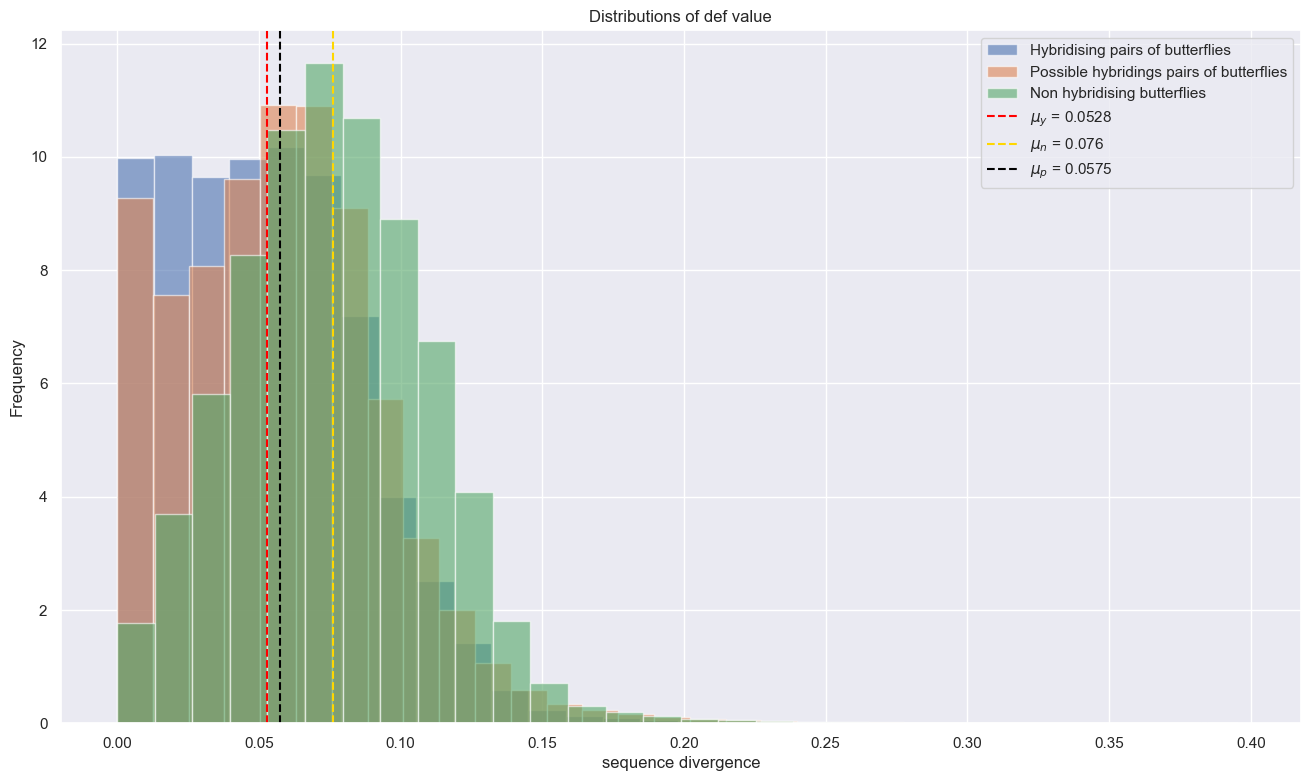

In [60]:
plt.title("Distributions of def value")
plt.hist(div_values_yes, bins=30, alpha=0.6, label='Hybridising pairs of butterflies', density=True);
plt.hist(div_values_possible, bins=30, alpha=0.6, label='Possible hybridings pairs of butterflies', density=True);
plt.hist(div_values_no, bins=30, alpha=0.6, label='Non hybridising butterflies', density=True);
plt.axvline(div_values_yes.mean(), label=f'$\mu_y$ = {div_values_yes.mean().round(4)}', linestyle='dashed', color='red')
plt.axvline(div_values_no.mean(), label=f'$\mu_n$ = {div_values_no.mean().round(4)}', linestyle='dashed', color='gold')
plt.axvline(div_values_possible.mean(), label=f'$\mu_p$ = {div_values_possible.mean().round(4)}', linestyle='dashed', color='black')
plt.xlabel('sequence divergence')
plt.ylabel('Frequency')

plt.legend();

fig5 = plt.gcf()
# fig5.savefig(r'/Users/disha/Desktop/Undergrad project/output_paf_files/Overall_distribution_plot1.png')


In [ ]:
fig5

In [ ]:
No          0.079430
Possible    0.061990
Yes         0.05337

In [ ]:
div_values_possible.mean().round(4)

In [ ]:
fig1.savefig(r'/Users/disha/Desktop/Undergrad project/output_paf_files/test_plot.png')

In [ ]:
plt.title('Hybridising sets')
plt.hist(div_values_yes, bins=30, alpha=0.6, label='Hybridising pairs of butterflies', density=True, color='pink');
plt.axvline(div_values_yes.mean(), label=f'$\mu_y$ = {div_values_yes.mean().round(4)}', linestyle='dashed', color='black')
plt.legend();
plt.xlabel('Sequence Divergence')
plt.ylabel('Frequency')
fig2 = plt.gcf()
fig2.savefig(r'/Users/disha/Desktop/Undergrad project/output_paf_files/yes_plot.png')


In [ ]:
plt.title('Non-Hybridising sets')
plt.hist(div_values_no, bins=30, alpha=0.6, label='Hybridising pairs of butterflies', density=True, color='pink');
plt.axvline(div_values_no.mean(), label=f'$\mu_y$ = {div_values_no.mean().round(4)}', linestyle='dashed', color='black')
plt.legend();
plt.xlabel('Sequence Divergence')
plt.ylabel('Frequency')
fig3 = plt.gcf()
fig3.savefig(r'/Users/disha/Desktop/Undergrad project/output_paf_files/no_plot.png')

In [ ]:
plt.title('Possible hybridising sets')
plt.hist(div_values_possible, bins=30, alpha=0.6, label='Hybridising pairs of butterflies', density=True,color='pink' );
plt.axvline(div_values_possible.mean(), label=f'$\mu_y$ = {div_values_possible.mean().round(4)}', linestyle='dashed', color='black')
plt.legend();
plt.xlabel('Sequence Divergence')
plt.ylabel('Frequency')
fig4 = plt.gcf()
fig4.savefig(r'/Users/disha/Desktop/Undergrad project/output_paf_files/possible_plot.png')


In [ ]:
tt = pd.concat([div_values_yes, div_values_possible])

In [ ]:
plt.hist(tt, bins=30, alpha=0.6, label='Hybridising pairs of butterflies', density=True);
plt.hist(div_values_no, bins=30, alpha=0.6, label='Non hybridising butterflies', density=True);
plt.axvline(tt.mean(), label=f'$\mu_y$ = {tt.mean().round(4)}', linestyle='dashed', color='red')
plt.axvline(div_values_no.mean(), label=f'$\mu_n$ = {div_values_no.mean().round(4)}', linestyle='dashed', color='gold')


plt.legend();

In [ ]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(div_values_yes, div_values_no, div_values_possible)

In [ ]:
# ratio of variance bteween groups to variance within groups
f_stat

In [ ]:
# p value ( p< 0.05 is statisrtically significaiont)

p_value

In [ ]:
mapping['bfly_mean_def'] = mapping.apply(lambda x: pd.Series(record_dictionary[x.bfly]).astype(float).mean(), axis=1)

In [ ]:
mapping.to_clipboard()

In [ ]:
mapping.query("answer == 'Yes'")

In [ ]:
s_test = pd.Series(record_dictionary['heliconius_ismenius _numata']).astype(float)

In [ ]:
s_test.mean()

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define your data
Yes = div_values_yes.to_list()
No = div_values_no.to_list()
Possible = div_values_possible.to_list()

# Combine data
data = pd.DataFrame({
    "value": Yes + No + Possible,
    "group": ["Yes"] * len(Yes) + ["No"] * len(No) + ["Possible"] * len(Possible)
})

# Fit ANOVA model
model = ols("value ~ group", data=data).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table)

# Perform Tukey's HSD
tukey = pairwise_tukeyhsd(endog=data["value"], groups=data["group"], alpha=0.05)
print("\nTukey's HSD Test:")
print(tukey)

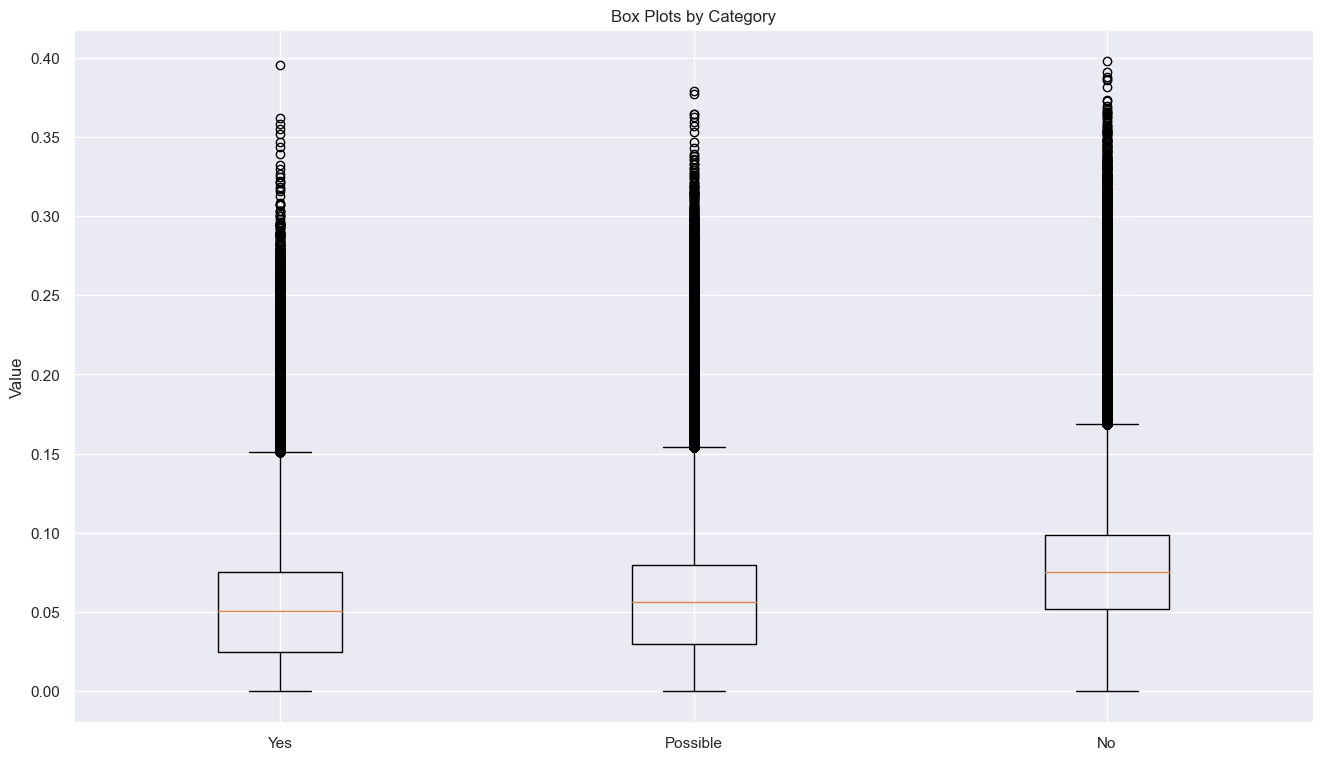

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Each category as a list (replace with actual data arrays if available)
data_yes = div_values_yes.to_list()
data_possible = div_values_possible.to_list()
data_no = div_values_no.to_list()

# ax = sns.boxplot(x='group', y='value', data=df, palette='Set2', width=0.6, showfliers=False)




# Combine them into a list of datasets
data = [data_yes, data_possible, data_no]

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['Yes', 'Possible', 'No'])
ax.set_ylabel("Value")
ax.set_title("Box Plots by Category")
plt.show()

In [ ]:
div_values_yes
div_values_no
div_values_possible

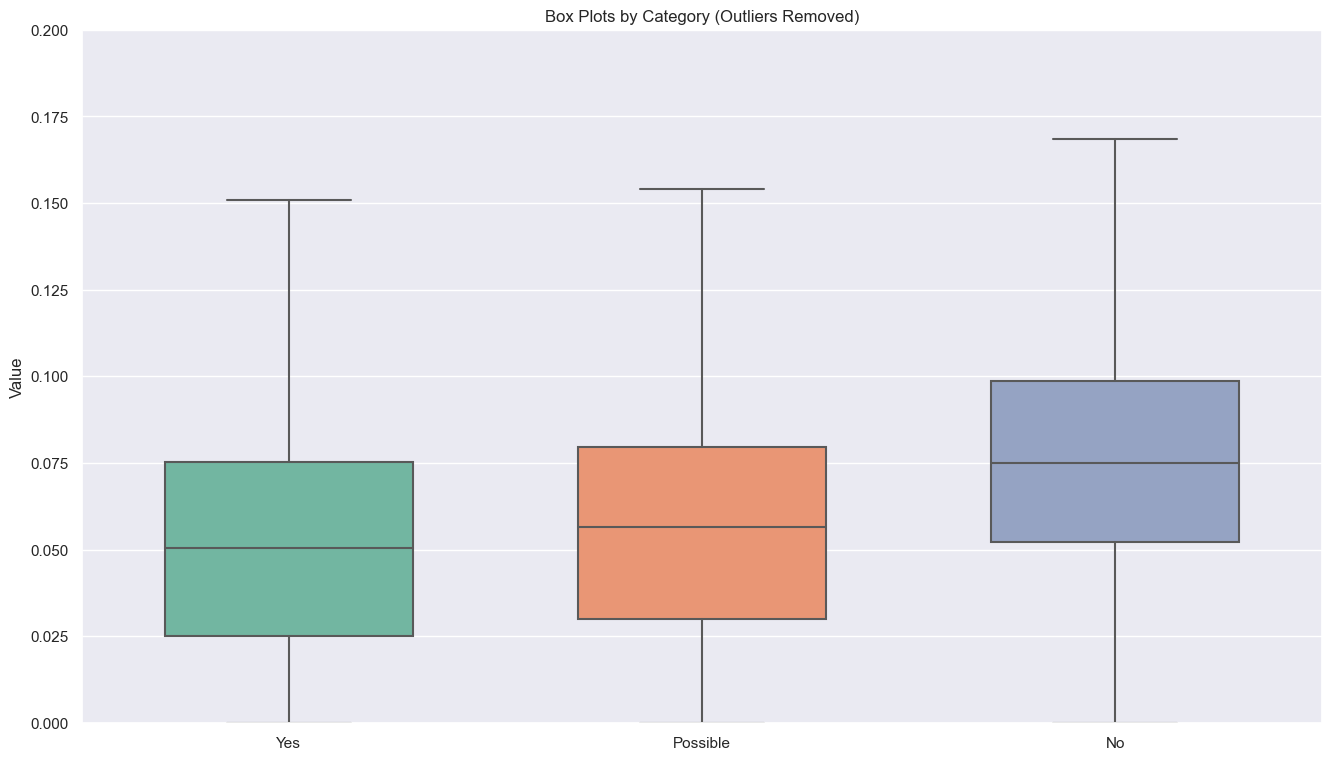

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Each category as a list (replace with actual data arrays if available)
data_yes = div_values_yes.to_list()
data_possible = div_values_possible.to_list()
data_no = div_values_no.to_list()

# Combine them into a list of datasets
data = [data_yes, data_possible, data_no]

# Create the plot
fig, ax = plt.subplots()

# Use seaborn's boxplot to remove outliers (showfliers=False)
sns.boxplot(data=data, palette='Set2', width=0.6, showfliers=False, ax=ax)

# Set x-tick labels and other plot parameters
ax.set_xticklabels(['Yes', 'Possible', 'No'])
ax.set_ylabel("Value")
ax.set_ylim(0, 0.20)  # Set y-axis limit from 0 to 0.20
ax.set_title("Box Plots by Category (Outliers Removed)")

# Display the plot
plt.show()


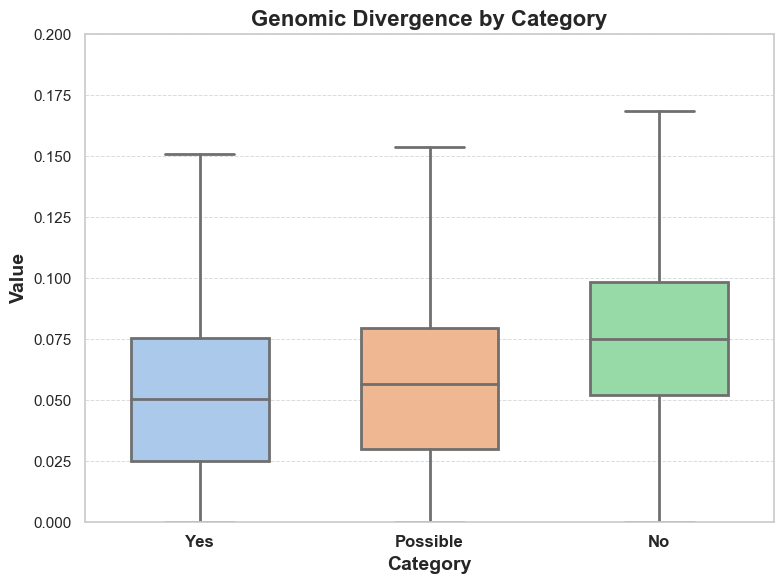

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn theme for a clean and professional look
sns.set_theme(style="whitegrid")

# Each category as a list (replace with actual data arrays if available)
data_yes = div_values_yes.to_list()
data_possible = div_values_possible.to_list()
data_no = div_values_no.to_list()

# Combine them into a list of datasets
data = [data_yes, data_possible, data_no]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))  # Larger figure size for clarity

# Use seaborn's boxplot for aesthetics and outlier removal
sns.boxplot(
    data=data,
    palette='pastel',      # Softer color palette for a professional look
    width=0.6,             # Box width
    showfliers=False,      # Removes outliers
    linewidth=2.0,         # Thicker lines for better visual impact
    ax=ax
)

# Styling the plot
ax.set_xticklabels(['Yes', 'Possible', 'No'], fontsize=12, fontweight='bold')
ax.set_ylabel("Value", fontsize=14, fontweight='bold')
ax.set_xlabel("Category", fontsize=14, fontweight='bold')
ax.set_ylim(0, 0.20)  # Set y-axis limit
ax.set_title("Genomic Divergence by Category", fontsize=16, fontweight='bold')

# Customize grid lines
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
ax.xaxis.grid(False)  # Remove vertical grid lines

# Add subtle shadow effect for depth
for patch in ax.artists:
    patch.set_edgecolor('gray')
    patch.set_linewidth(1.5)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()
